<a href="https://colab.research.google.com/github/dilshodbek-axmadov/MLDA.CW1.16668/blob/main/ML_16668.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time

In [2]:
def fetch_limited(url, limit=5000, page_size=500):
    """
    Fetch records from paginated API with a hard limit.
    """
    records = []
    page = 1

    while len(records) < limit:
        paged_url = f"{url}&page[size]={page_size}&page[number]={page}"
        print("Fetching:", paged_url)

        r = requests.get(paged_url)
        data = r.json()

        # Extract rows
        for item in data["data"]:
            records.append(item)

            if len(records) >= limit:
                break

        # Stop if no next page
        if data.get("next_page_url") is None:
            break

        page += 1

    return records


# ---- Fetch 5000 MAJOR ---- #
url_major = "https://roadtraffic.dft.gov.uk/api/average-annual-daily-flow-by-direction?filter[road_type]=Major"
records_major = fetch_limited(url_major, limit=5000, page_size=500)

# ---- Fetch 5000 MINOR ---- #
url_minor = "https://roadtraffic.dft.gov.uk/api/average-annual-daily-flow-by-direction?filter[road_type]=Minor"
records_minor = fetch_limited(url_minor, limit=5000, page_size=500)

# ---- Combine ---- #
all_records = records_major + records_minor

# Convert to dataframe
df = pd.DataFrame([item for item in all_records])

print("Shape:", df.shape)

Fetching: https://roadtraffic.dft.gov.uk/api/average-annual-daily-flow-by-direction?filter[road_type]=Major&page[size]=500&page[number]=1
Fetching: https://roadtraffic.dft.gov.uk/api/average-annual-daily-flow-by-direction?filter[road_type]=Major&page[size]=500&page[number]=2
Fetching: https://roadtraffic.dft.gov.uk/api/average-annual-daily-flow-by-direction?filter[road_type]=Major&page[size]=500&page[number]=3
Fetching: https://roadtraffic.dft.gov.uk/api/average-annual-daily-flow-by-direction?filter[road_type]=Major&page[size]=500&page[number]=4
Fetching: https://roadtraffic.dft.gov.uk/api/average-annual-daily-flow-by-direction?filter[road_type]=Major&page[size]=500&page[number]=5
Fetching: https://roadtraffic.dft.gov.uk/api/average-annual-daily-flow-by-direction?filter[road_type]=Major&page[size]=500&page[number]=6
Fetching: https://roadtraffic.dft.gov.uk/api/average-annual-daily-flow-by-direction?filter[road_type]=Major&page[size]=500&page[number]=7
Fetching: https://roadtraffic.dft.

In [3]:
df = df.drop(columns=['id'])
df.head()

,count_point_id,year,region_id,local_authority_id,road_name,road_category,road_type,start_junction_road_name,end_junction_road_name,easting,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,51,2000,1,1,A3111,PA,Major,"Pierhead, Hugh Town",A3112,90200,...,25,451,30,0,0,0,0,0,30,1430
1,51,2001,1,1,A3111,PA,Major,"Pierhead, Hugh Town",A3112,90200,...,27,451,28,0,0,0,0,0,28,1446
2,51,2002,1,1,A3111,PA,Major,"Pierhead, Hugh Town",A3112,90200,...,28,467,28,0,0,0,0,0,28,1518
3,51,2003,1,1,A3111,PA,Major,"Pierhead, Hugh Town",A3112,90200,...,29,509,27,0,0,0,0,0,27,1622
4,51,2004,1,1,A3111,PA,Major,"Pierhead, Hugh Town",A3112,90200,...,20,128,37,6,0,1,0,0,44,419


In [4]:
df.info() # let's see the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   count_point_id                10000 non-null  int64 
 1   year                          10000 non-null  int64 
 2   region_id                     10000 non-null  int64 
 3   local_authority_id            10000 non-null  int64 
 4   road_name                     10000 non-null  object
 5   road_category                 10000 non-null  object
 6   road_type                     10000 non-null  object
 7   start_junction_road_name      5000 non-null   object
 8   end_junction_road_name        5000 non-null   object
 9   easting                       10000 non-null  int64 
 10  northing                      10000 non-null  int64 
 11  latitude                      10000 non-null  object
 12  longitude                     10000 non-null  object
 13  link_length_km   

So, we have some columns that are in object format, we have to convert it into numbers:
latitude => decimal
longitude => decimal
link_length_km => decimal
link_length_miles => decimal

In [5]:
# Let's see the number of empty cols if we have
(df.isnull().sum()/len(df)*100).round(2)

,0
count_point_id,0.0
year,0.0
region_id,0.0
local_authority_id,0.0
road_name,0.0
road_category,0.0
road_type,0.0
start_junction_road_name,50.0
end_junction_road_name,50.0
easting,0.0


when we downloaded minor road type, in some columns we have null values for example in link_length_km column, start_junction_road_name,  and end_junction_road_name columns, all the values are null, because it is a small road.

In [6]:
# Numerical columns summary
print("\n--- Numerical Features Summary ---")
numerical_cols = df.select_dtypes(include=[np.number]).columns
display(df[numerical_cols].describe().T)


--- Numerical Features Summary ---


,count,mean,std,min,25%,50%,75%,max
count_point_id,10000.0,400664.3270,400147.006715,51.0,560.0,400329.5,800828.00,801614.0
year,10000.0,2016.9487,7.207154,2000.0,2012.0,2020.0,2022.00,2024.0
region_id,10000.0,5.0822,2.660855,1.0,4.0,4.0,7.00,11.0
local_authority_id,10000.0,62.0632,56.781643,1.0,14.0,25.5,99.00,214.0
easting,10000.0,362760.0555,114620.915548,90173.0,282700.0,328550.0,436071.00,650997.0
northing,10000.0,279024.2287,118784.917586,10217.0,199260.0,265018.0,357252.00,674066.0
pedal_cycles,10000.0,20.7621,49.213940,0.0,2.0,7.0,21.00,904.0
two_wheeled_motor_vehicles,10000.0,28.3612,38.948410,0.0,5.0,16.0,35.00,566.0
cars_and_taxis,10000.0,3287.9052,5563.677833,3.0,409.0,1461.0,3638.25,51411.0
buses_and_coaches,10000.0,29.9226,45.375444,0.0,1.0,12.0,38.00,388.0


In [7]:
print("\n--- Categorical Features Summary ---")
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"\nNumber of categorical columns: {len(categorical_cols)}")
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  - Unique values: {df[col].nunique()}")
    print(f"  - Most common: {df[col].mode()[0]} (count: {df[col].value_counts().iloc[0]})")


--- Categorical Features Summary ---

Number of categorical columns: 12

road_name:
  - Unique values: 184
  - Most common: C (count: 3235)

road_category:
  - Unique values: 5
  - Most common: MCU (count: 3834)

road_type:
  - Unique values: 2
  - Most common: Major (count: 5000)

start_junction_road_name:
  - Unique values: 100
  - Most common: LA Boundary (count: 498)

end_junction_road_name:
  - Unique values: 89
  - Most common: LA Boundary (count: 536)

latitude:
  - Unique values: 790
  - Most common: 51.47245104 (count: 50)

longitude:
  - Unique values: 790
  - Most common: -2.69753242 (count: 50)

link_length_km:
  - Unique values: 80
  - Most common: 4.60 (count: 326)

link_length_miles:
  - Unique values: 80
  - Most common: 2.86 (count: 326)

estimation_method:
  - Unique values: 2
  - Most common: Counted (count: 5432)

estimation_method_detailed:
  - Unique values: 4
  - Most common: Manual count (count: 5355)

direction_of_travel:
  - Unique values: 5
  - Most common: 

In [8]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(df)*100):.2f}%")


Number of duplicate rows: 0


Traffic Volume Analysis

In [9]:
vehicle_categories = [
    'pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis',
    'buses_and_coaches', 'lgvs', 'all_hgvs', 'all_motor_vehicles'
]
print("\n--- Traffic Volume Statistics ---")
traffic_stats = df[vehicle_categories].describe().T
display(traffic_stats)


--- Traffic Volume Statistics ---


,count,mean,std,min,25%,50%,75%,max
pedal_cycles,10000.0,20.7621,49.213940,0.0,2.0,7.0,21.00,904.0
two_wheeled_motor_vehicles,10000.0,28.3612,38.948410,0.0,5.0,16.0,35.00,566.0
cars_and_taxis,10000.0,3287.9052,5563.677833,3.0,409.0,1461.0,3638.25,51411.0
buses_and_coaches,10000.0,29.9226,45.375444,0.0,1.0,12.0,38.00,388.0
lgvs,10000.0,571.0798,984.350629,0.0,94.0,276.0,597.25,9822.0
all_hgvs,10000.0,191.3875,550.172486,0.0,10.0,40.0,123.00,7499.0
all_motor_vehicles,10000.0,4108.6385,7058.964866,9.0,551.0,1853.5,4504.00,67659.0


What can we conclude from this statistics? we can conclude that the number of vehicles passing a point in the road network in a particular day is at least 9. So, there will be at least 9 motor vehicles on a particular road. The maximum number of vehicles recorded on the road is nearly 68K. Sometimes, on a particular day, there will be no pedal cycles, buses or coaches, or lgvs or hgvs, but there will be at least 3 cars or taxis on the road.

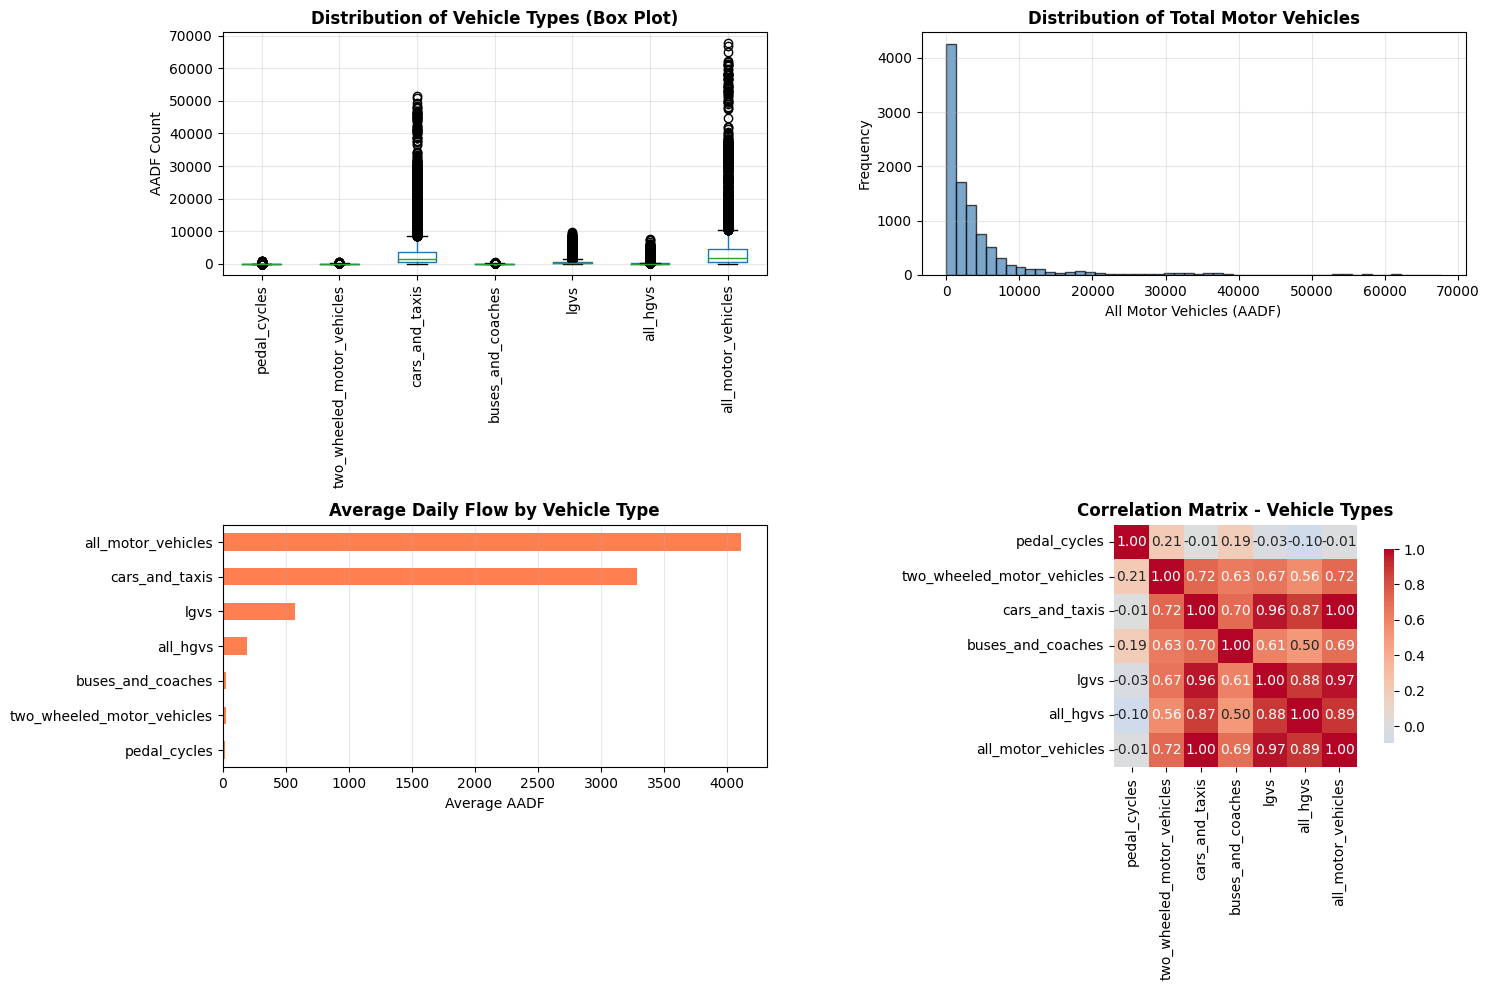

In [10]:
# Vehicle type distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Box plot for all vehicle types
ax1 = axes[0, 0]
df[vehicle_categories].boxplot(ax=ax1, rot=90)
ax1.set_title('Distribution of Vehicle Types (Box Plot)', fontsize=12, fontweight='bold')
ax1.set_ylabel('AADF Count')
ax1.grid(True, alpha=0.3)

# Histogram for total motor vehicles
ax2 = axes[0, 1]
ax2.hist(df['all_motor_vehicles'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
ax2.set_title('Distribution of Total Motor Vehicles', fontsize=12, fontweight='bold')
ax2.set_xlabel('All Motor Vehicles (AADF)')
ax2.set_ylabel('Frequency')
ax2.grid(True, alpha=0.3)

# Average traffic by vehicle type
ax3 = axes[1, 0]
avg_traffic = df[vehicle_categories].mean().sort_values(ascending=True)
avg_traffic.plot(kind='barh', ax=ax3, color='coral')
ax3.set_title('Average Daily Flow by Vehicle Type', fontsize=12, fontweight='bold')
ax3.set_xlabel('Average AADF')
ax3.grid(True, alpha=0.3, axis='x')

# Correlation heatmap
ax4 = axes[1, 1]
correlation_matrix = df[vehicle_categories].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, ax=ax4, square=True, cbar_kws={'shrink': 0.8})
ax4.set_title('Correlation Matrix - Vehicle Types', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


Temporal Analysis

In [11]:
print("\n--- Year Distribution ---")
print(df['year'].value_counts().sort_index())


--- Year Distribution ---
year
2000     191
2001     195
2002     205
2003     206
2004     205
2005     202
2006     203
2007     202
2008     202
2009     202
2010     202
2011     202
2012     210
2013     208
2014     206
2015     204
2016     202
2017     202
2018     202
2019     196
2020    1198
2021    1193
2022    1191
2023    1187
2024    1184
Name: count, dtype: int64


We can see the distribution of records by years. So, half of the records belongs to years from 2020 to 2024. Other years have the nearly the same distribution of records. As we extracted only 10.000 rows from the original dataset by equally getting minor and major road types, it affected the distribution of years.

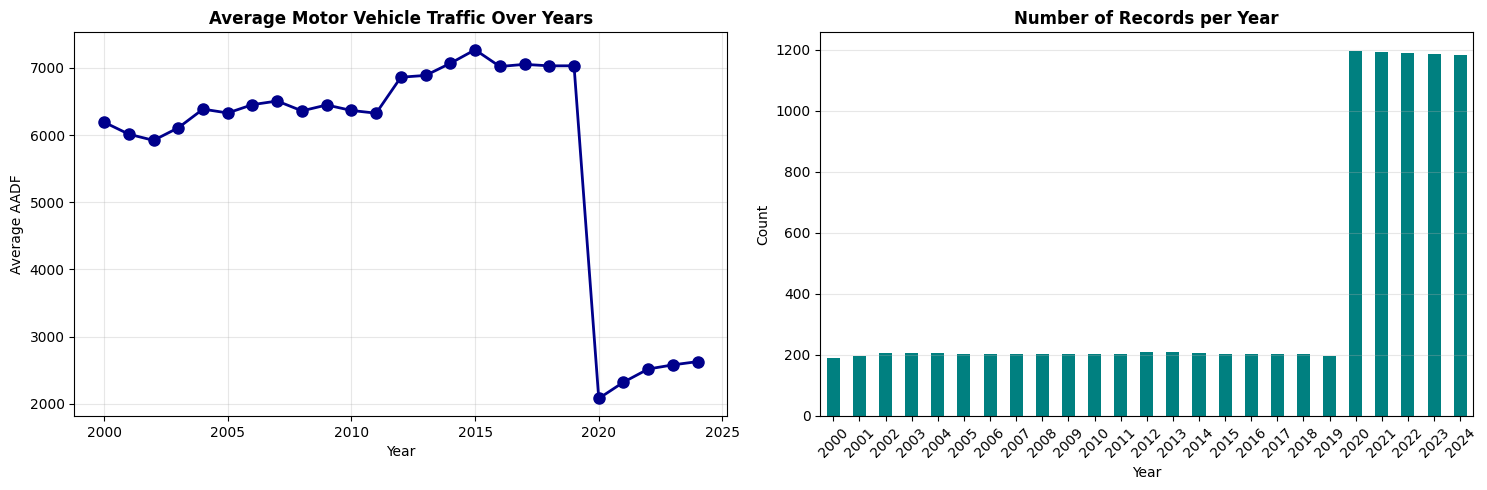

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Traffic trends over years
ax1 = axes[0]
yearly_traffic = df.groupby('year')['all_motor_vehicles'].mean()
ax1.plot(yearly_traffic.index, yearly_traffic.values, marker='o',
         linewidth=2, markersize=8, color='darkblue')
ax1.set_title('Average Motor Vehicle Traffic Over Years', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average AADF')
ax1.grid(True, alpha=0.3)

# Year distribution
ax2 = axes[1]
df['year'].value_counts().sort_index().plot(kind='bar', ax=ax2, color='teal')
ax2.set_title('Number of Records per Year', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Count')
ax2.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The line graph suggests that by 2020, there were around 6K-7K cars on average day, but in 2020, it dramatically decreased to nearly 2K, this can be associated with covid-19 pandemic. However as I mentioned before, as I randomly extracted 10K records from the original database, the records are not equally distributed

Road Category Analysis

In [13]:
print("\n--- Road Category Distribution ---")
print(df['road_category'].value_counts())


--- Road Category Distribution ---
road_category
MCU    3834
PA     2995
TA     1827
MB     1166
TM      178
Name: count, dtype: int64


The full description of each category name:
1.   MCU - Class C road or Unclassified road
2.   PA - Class A Principal road
3.   TA - Class A Trunk road
4.   MB - Class B road
5.   TM - M or Class A Trunk Motorway

In [14]:
print("\n--- Road Type Distribution ---")
print(df['road_type'].value_counts())


--- Road Type Distribution ---
road_type
Major    5000
Minor    5000
Name: count, dtype: int64


Here you can see, we have equal number of Major and Minor road types

Road Category Analysis

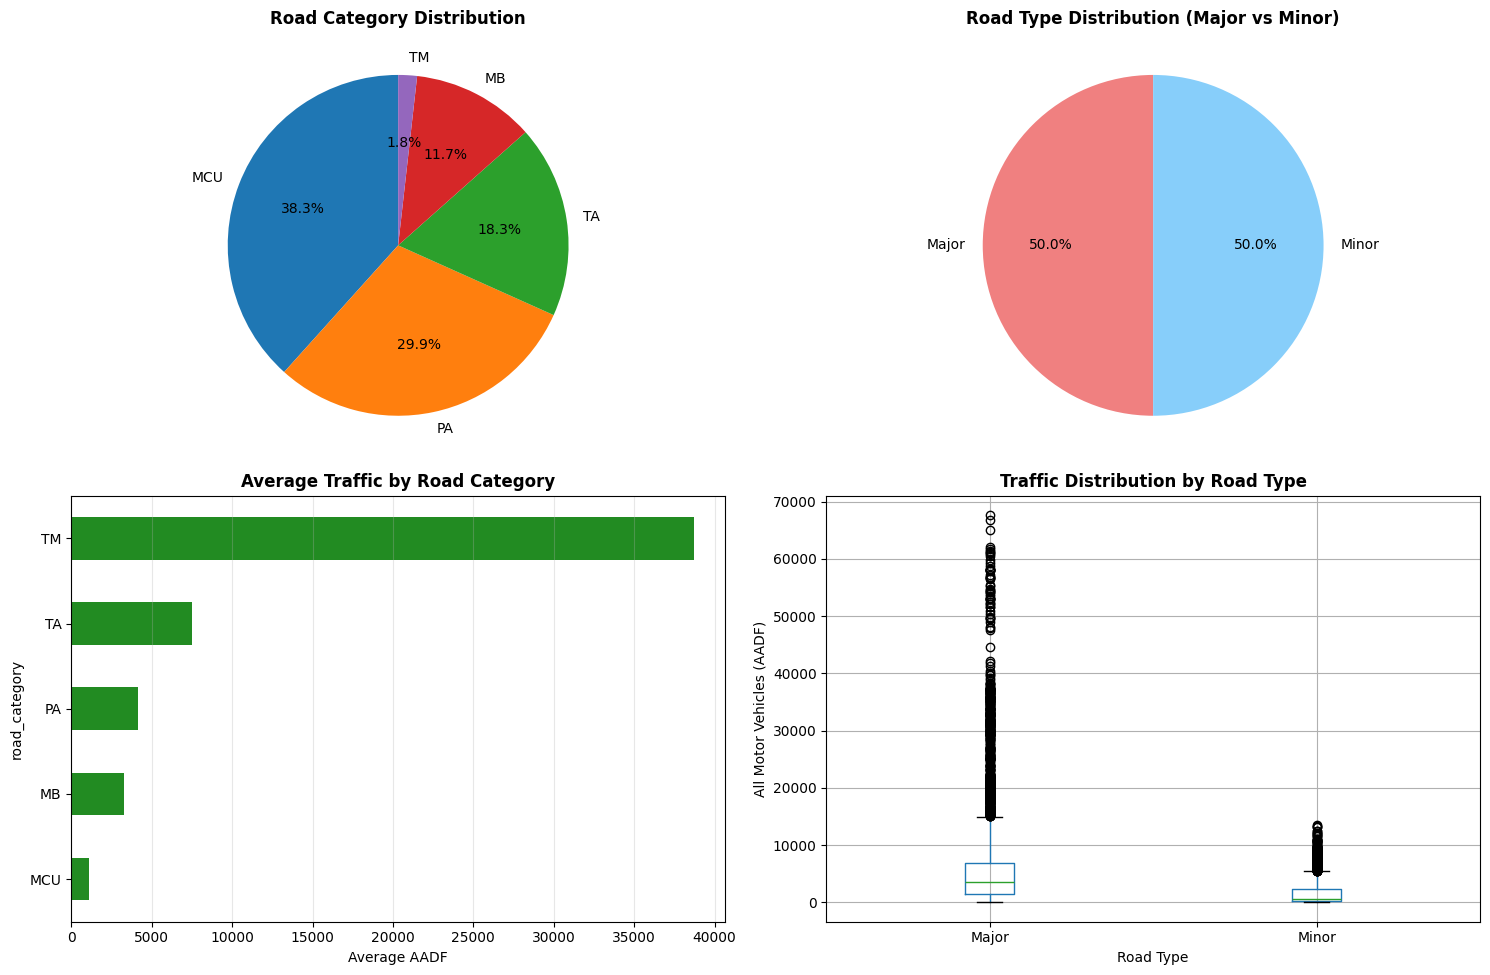

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Road category distribution
ax1 = axes[0, 0]
road_cat_counts = df['road_category'].value_counts()
ax1.pie(road_cat_counts.values, labels=road_cat_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Road Category Distribution', fontsize=12, fontweight='bold')

# Road type distribution
ax2 = axes[0, 1]
road_type_counts = df['road_type'].value_counts()
ax2.pie(road_type_counts.values, labels=road_type_counts.index, autopct='%1.1f%%',
        startangle=90, colors=['lightcoral', 'lightskyblue'])
ax2.set_title('Road Type Distribution (Major vs Minor)', fontsize=12, fontweight='bold')

# Traffic by road category
ax3 = axes[1, 0]
traffic_by_category = df.groupby('road_category')['all_motor_vehicles'].mean().sort_values(ascending=True)
traffic_by_category.plot(kind='barh', ax=ax3, color='forestgreen')
ax3.set_title('Average Traffic by Road Category', fontsize=12, fontweight='bold')
ax3.set_xlabel('Average AADF')
ax3.grid(True, alpha=0.3, axis='x')

# Traffic by road type
ax4 = axes[1, 1]
df.boxplot(column='all_motor_vehicles', by='road_type', ax=ax4)
ax4.set_title('Traffic Distribution by Road Type', fontsize=12, fontweight='bold')
ax4.set_xlabel('Road Type')
ax4.set_ylabel('All Motor Vehicles (AADF)')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

Geographical Analysis

In [16]:
print(f"\n--- Regional Distribution ---")
print(f"Number of unique regions: {df['region_id'].nunique()}")
print(f"Number of unique local authorities: {df['local_authority_id'].nunique()}")


--- Regional Distribution ---
Number of unique regions: 11
Number of unique local authorities: 115


In [17]:
# Here based on the dataset documentation, i have created region names, now we map them based on region id
region_names_mapped = {
    1:'South West',
    2:'East Midlands',
    3:'Scotland',
    4:'Wales',
    5:'North West',
    6:'London',
    7:'East of England',
    8:'Yorkshire and the Humber',
    9:'South East',
    10:'West Midlands',
    11:'North East'
}
df['region_name'] = df['region_id'].map(region_names_mapped)

In [18]:
# Top 10 regions by traffic volume
print("\n--- Top 10 Regions by Average Traffic ---")
top_regions = df.groupby('region_name')['all_motor_vehicles'].mean().sort_values(ascending=False).head(10)
print(top_regions)


--- Top 10 Regions by Average Traffic ---
region_name
Scotland                    28614.658537
Wales                        6715.644996
London                       3679.860000
East Midlands                1800.173145
West Midlands                1749.506667
North East                   1744.777778
East of England              1643.783673
South East                   1636.735294
Yorkshire and the Humber     1527.065957
South West                   1347.294912
Name: all_motor_vehicles, dtype: float64


Estimation Method Analysis

In [19]:
print("\n--- Estimation Methods ---")
print(df['estimation_method'].value_counts())


--- Estimation Methods ---
estimation_method
Counted      5432
Estimated    4568
Name: count, dtype: int64


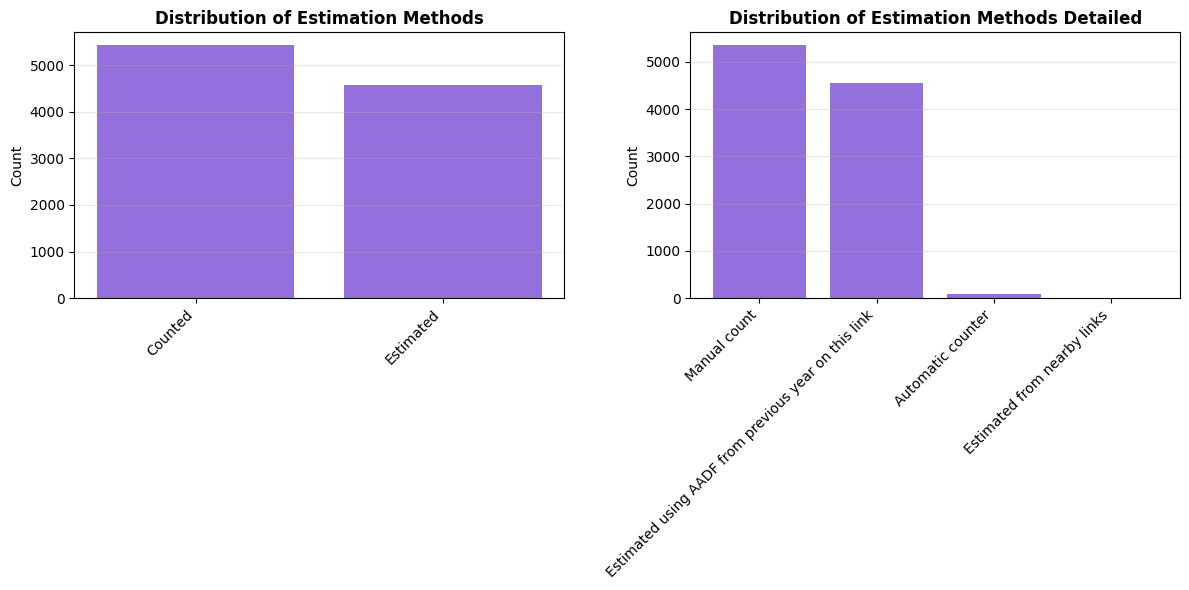

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax1 = ax[0]
estimation_counts = df['estimation_method'].value_counts()
ax1.bar(range(len(estimation_counts)), estimation_counts.values, color='mediumpurple')
ax1.set_xticks(range(len(estimation_counts)))
ax1.set_xticklabels(estimation_counts.index, rotation=45, ha='right')
ax1.set_title('Distribution of Estimation Methods', fontsize=12, fontweight='bold')
ax1.set_ylabel('Count')
ax1.grid(True, alpha=0.3, axis='y')

ax2 = ax[1]
estimation_counts = df['estimation_method_detailed'].value_counts()
ax2.bar(range(len(estimation_counts)), estimation_counts.values, color='mediumpurple')
ax2.set_xticks(range(len(estimation_counts)))
ax2.set_xticklabels(estimation_counts.index, rotation=45, ha='right')
ax2.set_title('Distribution of Estimation Methods Detailed', fontsize=12, fontweight='bold')
ax2.set_ylabel('Count')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

Outlier detection

In [21]:
# Using IQR method for outlier detection
print("\n--- Outliers in Traffic Data (IQR Method) ---")
for col in vehicle_categories:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")


--- Outliers in Traffic Data (IQR Method) ---
pedal_cycles: 940 outliers (9.40%)
two_wheeled_motor_vehicles: 696 outliers (6.96%)
cars_and_taxis: 865 outliers (8.65%)
buses_and_coaches: 811 outliers (8.11%)
lgvs: 898 outliers (8.98%)
all_hgvs: 1170 outliers (11.70%)
all_motor_vehicles: 870 outliers (8.70%)


In [22]:
print(f"""
Key Findings from EDA:
---------------------
1. Dataset contains {df.shape[0]} traffic count records across {df['year'].nunique()} years
2. There were missing values in this columns {df.columns[df.isnull().any()].tolist()}
3. Cars and taxis dominate traffic with average AADF of {df['cars_and_taxis'].mean():.0f}
4. Major roads have {df[df['road_type']=='Major']['all_motor_vehicles'].mean():.0f} avg vehicles
5. Minor roads have {df[df['road_type']=='Minor']['all_motor_vehicles'].mean():.0f} avg vehicles
6. Strong correlation between cars_and_taxis and all_motor_vehicles
7. Data spans {df['region_id'].nunique()} regions and {df['local_authority_id'].nunique()} local authorities
8. {df['estimation_method'].value_counts().index[0]} is the most common estimation method
""")


Key Findings from EDA:
---------------------
1. Dataset contains 10000 traffic count records across 25 years
2. There were missing values in this columns ['start_junction_road_name', 'end_junction_road_name', 'link_length_km', 'link_length_miles']
3. Cars and taxis dominate traffic with average AADF of 3288
4. Major roads have 6621 avg vehicles
5. Minor roads have 1597 avg vehicles
6. Strong correlation between cars_and_taxis and all_motor_vehicles
7. Data spans 11 regions and 115 local authorities
8. Counted is the most common estimation method



Data Preparation and Preprocessing

In [23]:
df.head()

,count_point_id,year,region_id,local_authority_id,road_name,road_category,road_type,start_junction_road_name,end_junction_road_name,easting,...,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles,region_name
0,51,2000,1,1,A3111,PA,Major,"Pierhead, Hugh Town",A3112,90200,...,451,30,0,0,0,0,0,30,1430,South West
1,51,2001,1,1,A3111,PA,Major,"Pierhead, Hugh Town",A3112,90200,...,451,28,0,0,0,0,0,28,1446,South West
2,51,2002,1,1,A3111,PA,Major,"Pierhead, Hugh Town",A3112,90200,...,467,28,0,0,0,0,0,28,1518,South West
3,51,2003,1,1,A3111,PA,Major,"Pierhead, Hugh Town",A3112,90200,...,509,27,0,0,0,0,0,27,1622,South West
4,51,2004,1,1,A3111,PA,Major,"Pierhead, Hugh Town",A3112,90200,...,128,37,6,0,1,0,0,44,419,South West


In [24]:
# First we have to drop the columns that are not used in the machine learning process
cols_used = ['year', 'region_name', 'local_authority_id', 'road_category','road_type','link_length_km', 'estimation_method','direction_of_travel','all_motor_vehicles']
df_cleaned = df[cols_used]
df_cleaned.head()

,year,region_name,local_authority_id,road_category,road_type,link_length_km,estimation_method,direction_of_travel,all_motor_vehicles
0,2000,South West,1,PA,Major,0.30,Estimated,C,1430
1,2001,South West,1,PA,Major,0.30,Estimated,C,1446
2,2002,South West,1,PA,Major,0.30,Estimated,C,1518
3,2003,South West,1,PA,Major,0.30,Estimated,C,1622
4,2004,South West,1,PA,Major,0.30,Counted,N,419


Here, I dropped many cols including all all types of vehicles, becuase all_motor_vehicles column is the sum of all other columns, so just deleted. Also, other categorical cols are dropped such as region_id, region_ons_code and so on.

In [25]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 10000 non-null  int64 
 1   region_name          10000 non-null  object
 2   local_authority_id   10000 non-null  int64 
 3   road_category        10000 non-null  object
 4   road_type            10000 non-null  object
 5   link_length_km       5000 non-null   object
 6   estimation_method    10000 non-null  object
 7   direction_of_travel  10000 non-null  object
 8   all_motor_vehicles   10000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 703.3+ KB


In [26]:
null_counts = df_cleaned.groupby('road_type')['link_length_km'].apply(lambda x: x.isna().sum())
null_counts

,link_length_km
road_type,
Major,0
Minor,5000


Still we have some problems with link_length_km. Firstly, the data type is object, not decimal, second and biggest problem is 50% of the data is null. For Major road type, all the values for link_length_km is given, no null, but for Minor road type, all the values are null, if we keep this column, then we will have data leakage, so just drop it.

In [27]:
df_cleaned = df_cleaned.drop(columns=['link_length_km'])

In [28]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [29]:
X = df_cleaned.drop(columns=['all_motor_vehicles']) # this is features
y = df_cleaned['all_motor_vehicles'] # this is target column

In [30]:
# divide into train and test columns
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [31]:
df_cleaned.head()

,year,region_name,local_authority_id,road_category,road_type,estimation_method,direction_of_travel,all_motor_vehicles
0,2000,South West,1,PA,Major,Estimated,C,1430
1,2001,South West,1,PA,Major,Estimated,C,1446
2,2002,South West,1,PA,Major,Estimated,C,1518
3,2003,South West,1,PA,Major,Estimated,C,1622
4,2004,South West,1,PA,Major,Counted,N,419


In [32]:
cat_cols = ['region_name','local_authority_id', 'road_category','road_type','estimation_method', 'direction_of_travel']
passthrough_columns = [col for col in X.columns if col not in cat_cols]

# creating processor
processor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', sparse_output=False), cat_cols),
    ('pass', 'passthrough', passthrough_columns)
])

In [33]:
# prepare the data fully for machine learning
X_train_processed = processor.fit_transform(X_train)
X_test_processed = processor.transform(X_test)

Now, let's create Machine Learning models

In [34]:
# before we create machine learning model, let's create a function to evaluate the model accuracy
def evaluate_model(y_true, y_pred, model_name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{'='*50}")
    print(f"{model_name.upper()} Performance")
    print(f"{'='*50}")
    print(f"RMSE      :{rmse:.5f}")
    print(f"MSE       :{mse:.5f}")
    print(f"MAE       :{mae:.5f}")
    print(f"R² Score  : {r2:.5f}")
    print(f"{'='*50}\n")

    return {
        'Model':model_name,
        'RMSE':round(rmse,5),
        'MSE':round(mse,5),
        'MAE':round(mae,5),
        'R2':round(r2,5)
    }

In [35]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train_processed,y_train)
y_pred_linear = linear_model.predict(X_test_processed)
report_linear = evaluate_model(y_test,y_pred_linear,"Linear Regression")
report_linear


LINEAR REGRESSION Performance
RMSE      :3596.92979
MSE       :12937903.94177
MAE       :2035.95304
R² Score  : 0.76508



{'Model': 'Linear Regression',
 'RMSE': np.float64(3596.92979),
 'MSE': 12937903.94177,
 'MAE': 2035.95304,
 'R2': 0.76508}

In [36]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(
    alpha=0.001,
    max_iter=10000,
    tol=1e-4,
    random_state=42
)
lasso_model.fit(X_train_processed, y_train)
y_pred_lasso = lasso_model.predict(X_test_processed)

report_lasso = evaluate_model(y_test, y_pred_lasso, "Lasso Regression")


LASSO REGRESSION Performance
RMSE      :3596.94028
MSE       :12937979.37562
MAE       :2035.95299
R² Score  : 0.76508



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.684e+10, tolerance: 3.880e+07
  model = cd_fast.enet_coordinate_descent(


In [37]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(
    alpha=1.0,
    max_iter=10000,
    random_state=42,
    solver='auto'
)

ridge_model.fit(X_train_processed, y_train)
y_pred_ridge = ridge_model.predict(X_test_processed)

report_ridge = evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
report_ridge


RIDGE REGRESSION Performance
RMSE      :3608.12779
MSE       :13018586.11860
MAE       :2045.88373
R² Score  : 0.76361



{'Model': 'Ridge Regression',
 'RMSE': np.float64(3608.12779),
 'MSE': 13018586.1186,
 'MAE': 2045.88373,
 'R2': 0.76361}

Now, let's test Tree models

In [38]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=1000,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1,
    warm_start=False
)

# Fit the model
rf_model.fit(X_train_processed, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_processed)

# Evaluate exactly like you did with CatBoost
report_rf = evaluate_model(y_test, y_pred_rf, "RandomForest Regressor")
report_rf


RANDOMFOREST REGRESSOR Performance
RMSE      :3139.76972
MSE       :9858153.87278
MAE       :1843.58878
R² Score  : 0.82100



{'Model': 'RandomForest Regressor',
 'RMSE': np.float64(3139.76972),
 'MSE': 9858153.87278,
 'MAE': 1843.58878,
 'R2': 0.821}

In [39]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train_processed, y_train)
y_pred_xgb = xgb_model.predict(X_test_processed)

report_xgb = evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")
report_xgb


XGBOOST REGRESSOR Performance
RMSE      :3016.71212
MSE       :9100552.00000
MAE       :1637.64148
R² Score  : 0.83476



{'Model': 'XGBoost Regressor',
 'RMSE': np.float64(3016.71212),
 'MSE': 9100552.0,
 'MAE': 1637.64148,
 'R2': 0.83476}

In [40]:
df_cleaned.columns

Index(['year', 'region_name', 'local_authority_id', 'road_category',
       'road_type', 'estimation_method', 'direction_of_travel',
       'all_motor_vehicles'],
      dtype='object')

In [41]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


In [42]:
from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    random_seed=42,
    verbose=100
)
# fit the model
catboost_model.fit(X_train_processed, y_train)
# predict
y_pred_catboost = catboost_model.predict(X_test_processed)

report_catboost = evaluate_model(y_test, y_pred_catboost, "CatBoost Regressor")
report_catboost

0:	learn: 6747.7434187	total: 51.1ms	remaining: 51.1s
100:	learn: 3031.3881872	total: 355ms	remaining: 3.15s
200:	learn: 2787.7957213	total: 556ms	remaining: 2.21s
300:	learn: 2671.6664309	total: 777ms	remaining: 1.8s
400:	learn: 2590.3656521	total: 1.2s	remaining: 1.79s
500:	learn: 2536.7507274	total: 1.44s	remaining: 1.43s
600:	learn: 2491.0907027	total: 1.86s	remaining: 1.23s
700:	learn: 2458.3179957	total: 2.35s	remaining: 1s
800:	learn: 2425.9730320	total: 2.93s	remaining: 728ms
900:	learn: 2397.2413450	total: 3.52s	remaining: 386ms
999:	learn: 2378.7991046	total: 4.02s	remaining: 0us

CATBOOST REGRESSOR Performance
RMSE      :2746.28583
MSE       :7542085.88519
MAE       :1559.85957
R² Score  : 0.86305



{'Model': 'CatBoost Regressor',
 'RMSE': np.float64(2746.28583),
 'MSE': 7542085.88519,
 'MAE': 1559.85957,
 'R2': 0.86305}

Model Comparison

In [45]:
reports = [
    report_xgb,
    report_catboost,
    report_rf,
    report_linear,
    report_lasso
]
results_df = pd.DataFrame(reports)
results_df['MSE'] = results_df['MSE'].round(2)
results_df.sort_values(by='R2', ascending=False)

,Model,RMSE,MSE,MAE,R2
1,CatBoost Regressor,2746.28583,7542085.89,1559.85957,0.86305
0,XGBoost Regressor,3016.71212,9100552.00,1637.64148,0.83476
2,RandomForest Regressor,3139.76972,9858153.87,1843.58878,0.82100
3,Linear Regression,3596.92979,12937903.94,2035.95304,0.76508
4,Lasso Regression,3596.94028,12937979.38,2035.95299,0.76508
